<a href="https://www.kaggle.com/code/yousefelbaz/crop-recommendation-lstm-ye?scriptVersionId=126175030" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from keras.layers import Input, Dense, Dropout
from sklearn.metrics import confusion_matrix
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


import pickle


import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [2]:
df_crop = pd.read_csv('../input/crop-recommendation-dataset/Crop_recommendation.csv')
df_crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df_crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [4]:
df_crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
df_crop['label'].nunique()

22

In [6]:
df_crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df_crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df_crop['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [10]:
df_crop.describe().T


,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [11]:
pd.pivot_table(df_crop, index=['label'], aggfunc='mean')


,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [12]:
acc = []
model = []
x = df_crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df_crop['label']
print("Shape of x:", x.shape, "Shape of y:", y.shape)

Shape of x: (2200, 7) Shape of y: (2200,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=0)

In [14]:
DecisionTree = DecisionTreeClassifier(
    criterion="entropy", random_state=42)
DecisionTree.fit(x_train, y_train)
predicted_values = DecisionTree.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print(classification_report(y_test, predicted_values))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.96      0.87      0.92        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.93      1.00      0.96        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.94      0.97        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       0.95    

In [15]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
DecisionTreeprediction = DecisionTree.predict(data)
print(DecisionTreeprediction)

['coffee']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [16]:
# Save Model as Pickel
DT_pkl_filename = 'DecisionTree.pkl'
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
DT_Model_pkl.close()

In [17]:
print('Decision Tree Accuracy on training set: ',
      DecisionTree.score(x_train, y_train))
print('Decision Tree Accuracy on test set: ',
      DecisionTree.score(x_test, y_test))

Decision Tree Accuracy on training set:  1.0
Decision Tree Accuracy on test set:  0.9878787878787879


([<matplotlib.axis.XTick at 0x7abad8dbefd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

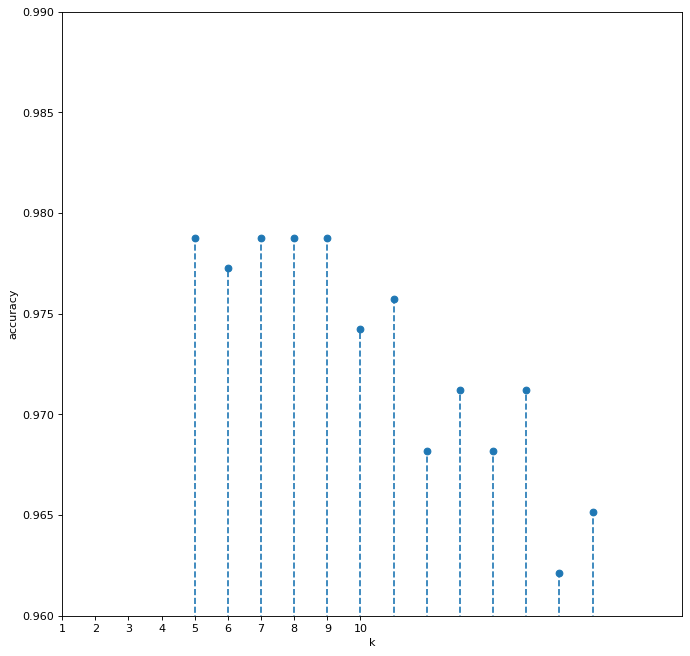

In [18]:
k_range = range(5, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
from matplotlib.pyplot import figure

figure(figsize=(10, 10), dpi=80)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range, 0, scores, linestyle="dashed")
plt.ylim(0.96, 0.99)
plt.xticks([i for i in range(1, 11)])


In [19]:
KNN = KNeighborsClassifier(n_neighbors=9).fit(x_train, y_train)
predicted_values = KNN.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('K Nearest Neighbors')
print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      1.00      0.98        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        30
        jute       0.81      0.97      0.88        31
 kidneybeans       0.87      1.00      0.93        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      0.96      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [20]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
KNNprediction = KNN.predict(data)
print(KNNprediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [21]:
# Save Model as Pickel
KNN_pkl_filename = 'KNNprediction.pkl'
KNN_Model_pkl = open(KNN_pkl_filename, 'wb')
pickle.dump(KNN, KNN_Model_pkl)
KNN_Model_pkl.close()

In [22]:
print('KNN Accuracy on training set: ', KNN.score(x_train, y_train))
print('KNN Accuracy on test set: ', KNN.score(x_test, y_test))


KNN Accuracy on training set:  0.9824675324675325
KNN Accuracy on test set:  0.9787878787878788


In [23]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(x_train, y_train)
predicted_values = NaiveBayes.predict(x_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print(classification_report(y_test, predicted_values))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       1.00      1.00      1.00        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       0.91      0.97      0.94        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       1.00      1.00      1.00        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      1.00      1.00        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [24]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
NaiveBayesprediction = NaiveBayes.predict(data)
print(NaiveBayesprediction)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


['jute']


In [25]:
print('NaiveBayes Accuracy on training set: ',
      NaiveBayes.score(x_train, y_train))
print('NaiveBayes Accuracy on test set: ', NaiveBayes.score(x_test, y_test))

NaiveBayes Accuracy on training set:  0.9948051948051948
NaiveBayes Accuracy on test set:  0.9939393939393939


In [26]:
# Save Model as Pickel
NB_pkl_filename = 'NBClassifier.pkl'
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
NB_Model_pkl.close()

In [27]:
RandomForest = RandomForestClassifier(n_estimators=20, random_state=0)
RandomForest.fit(x_train, y_train)

predicted_values = RandomForest.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RandomForest')
print(classification_report(y_test, predicted_values))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        30
   blackgram       0.97      0.97      0.97        31
    chickpea       1.00      1.00      1.00        34
     coconut       1.00      1.00      1.00        26
      coffee       1.00      1.00      1.00        29
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        30
        jute       1.00      0.97      0.98        31
 kidneybeans       1.00      1.00      1.00        26
      lentil       1.00      1.00      1.00        22
       maize       0.96      1.00      0.98        27
       mango       1.00      1.00      1.00        28
   mothbeans       1.00      0.97      0.99        36
    mungbean       1.00      1.00      1.00        29
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        34
      papaya       1.00    

In [28]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
RandomForestPrediction = RandomForest.predict(data)
print(RandomForestPrediction)

['jute']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [29]:
print('Random Forest Accuracy on training set: ',
      RandomForest.score(x_train, y_train))
print('Random Forest Accuracy on test set: ',
      RandomForest.score(x_test, y_test))

Random Forest Accuracy on training set:  1.0
Random Forest Accuracy on test set:  0.9954545454545455


In [30]:
# Save Model as Pickel
RF_pkl_filename = 'RandomForest.pkl'
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RandomForest, RF_Model_pkl)
RF_Model_pkl.close()

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

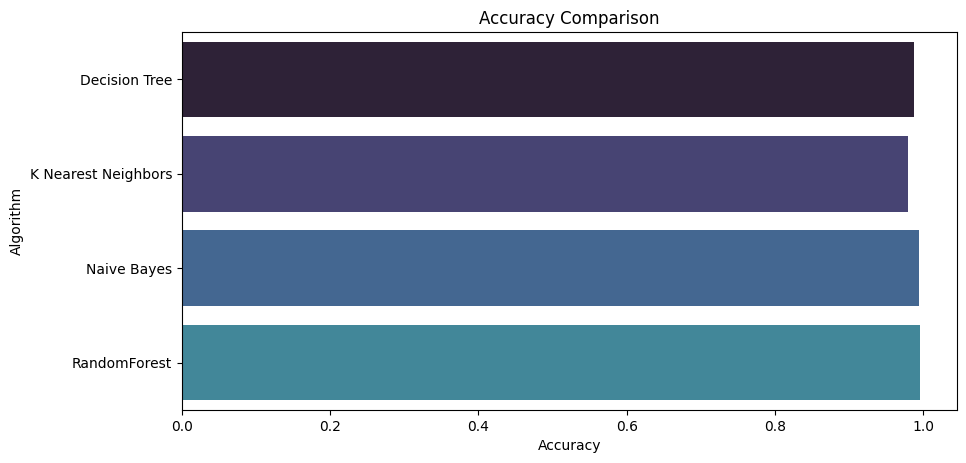

In [31]:
plt.figure(figsize=[10, 5], dpi=100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x=acc, y=model, palette=sns.color_palette("mako"))

In [32]:
# Check Model's Accuracy
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print(k, ' : ', v)

Decision Tree  :  0.9878787878787879
K Nearest Neighbors  :  0.9787878787878788
Naive Bayes  :  0.9939393939393939
RandomForest  :  0.9954545454545455


In [33]:
proba_estimates = DecisionTree.predict_proba(x_test)

# Get indices of top 3 probabilities
top3_indices = np.argsort(-proba_estimates)[0][:3]

# Get class labels corresponding to top 3 indices
top3_labels = DecisionTree.classes_[top3_indices]

In [34]:
top3_labels

array(['watermelon', 'pomegranate', 'pigeonpeas'], dtype=object)

In [35]:
proba_estimates = RandomForest.predict_proba(x_test)

# Get indices of top 3 probabilities
top3_indices = np.argsort(-proba_estimates)[0][:3]

# Get class labels corresponding to top 3 indices
top3_labels = RandomForest.classes_[top3_indices]

In [36]:
top3_labels

array(['watermelon', 'papaya', 'pomegranate'], dtype=object)

In [37]:
new_data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
probabilities = DecisionTree.predict_proba(new_data)
top3_indices = np.argsort(-probabilities)[0][:3]
top3_predictions = DecisionTree.classes_[top3_indices]
print(f"Top 3 predictions: {top3_predictions}")

Top 3 predictions: ['coffee' 'apple' 'pomegranate']


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [38]:
new_data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
probabilities = DecisionTree.predict_proba(new_data)
top3_indices = np.argsort(-probabilities)[0][:3]
top3_predictions = DecisionTree.classes_[top3_indices]
print(f"Top 3 predictions: {top3_predictions}")

# create an empty dictionary for top 3 predictions
top3_predictions_dict = {}

# add the top 3 predictions to the dictionary
for i, prediction in enumerate(top3_predictions):
    top3_predictions_dict[f"Crop {i+1}"] = prediction

# print the top 3 predictions dictionary
# print("Top 3 predictions:")
# for key, value in top3_predictions_dict.items():
#     print(f"{key}: {value}")
    
    

    crop_data = {
    "apple": {"co2_emissions": 1.5, "o2_emissions": 0.4, "water_usage": 800,"carbon_footprint":0.98 },
    "banana": {"co2_emissions": 0.9, "o2_emissions": 0.2, "water_usage": 790,"carbon_footprint":0.78},
    "blackgram": {"co2_emissions": 0.9, "o2_emissions": 0.4, "water_usage": 350,"carbon_footprint":0.78},
    "chickpea": {"co2_emissions": 0.8, "o2_emissions": 0.3, "water_usage": 450,"carbon_footprint":0.67},
    "coconut": {"co2_emissions": 1.2, "o2_emissions": 0.2, "water_usage": 650,"carbon_footprint":1.20},
    "coffee": {"co2_emissions": 1.2, "o2_emissions": 0.5, "water_usage": 650,"carbon_footprint":0.43},
    "cotton": {"co2_emissions": 0.8, "o2_emissions": 0.3, "water_usage": 500,"carbon_footprint":0.64},
    "grapes": {"co2_emissions": 1.2, "o2_emissions": 0.2, "water_usage": 770,"carbon_footprint":0.57},
    "jute": {"co2_emissions": 1.3, "o2_emissions": 0.3, "water_usage": 300,"carbon_footprint":1.40},
    "kidneybeans": {"co2_emissions": 1.2, "o2_emissions": 0.4, "water_usage": 450,"carbon_footprint":0.69},
    "lentil": {"co2_emissions": 0.7, "o2_emissions": 0.3, "water_usage": 450,"carbon_footprint":0.76},
    "maize": {"co2_emissions": 1.0, "o2_emissions": 0.3, "water_usage": 450,"carbon_footprint":1.00},
    "mango": {"co2_emissions": 1.3, "o2_emissions": 0.3, "water_usage": 400,"carbon_footprint":0.90},
    "mothbeans": {"co2_emissions": 0.7, "o2_emissions": 0.3, "water_usage": 350,"carbon_footprint":0.67},
    "mungbean": {"co2_emissions": 0.6, "o2_emissions": 0.3, "water_usage": 200,"carbon_footprint":0.47},
    "muskmelon": {"co2_emissions": 0.8, "o2_emissions": 0.1, "water_usage": 600,"carbon_footprint":0.32},
    "orange": {"co2_emissions": 1.2, "o2_emissions": 0.2, "water_usage": 790,"carbon_footprint":0.70},
    "papaya": {"co2_emissions": 0.9, "o2_emissions": 0.3, "water_usage": 600,"carbon_footprint":0.39},
    "pigeonpeas": {"co2_emissions": 1.1, "o2_emissions": 0.4, "water_usage": 350,"carbon_footprint":0.59},
    "pomegranate": {"co2_emissions": 1.1, "o2_emissions": 0.6, "water_usage": 450,"carbon_footprint":0.55},
    "rice": {"co2_emissions": 1.3, "o2_emissions": 0.4, "water_usage": 900,"carbon_footprint":1.20},
    "watermelon": {"co2_emissions": 0.6, "o2_emissions": 0.1, "water_usage":250,"carbon_footprint":0.29}
    }

# Retrieve the top 3 predictions and calculate the CO2, O2, water usage, and carbon footprint values for each crop
top3_predictions_data = {}
for prediction in top3_predictions:
    crop_data_for_prediction = crop_data.get(prediction.lower())
    if crop_data_for_prediction:
        top3_predictions_data[prediction] = crop_data_for_prediction

# Calculate the total CO2, O2, water usage, and carbon footprint values for the top 3 predictions
total_co2 = sum(crop_data.get("co2_emissions", 0) for crop_data in top3_predictions_data.values())
total_o2 = sum(crop_data.get("o2_emissions", 0) for crop_data in top3_predictions_data.values())
total_water_usage = sum(crop_data.get("water_usage", 0) for crop_data in top3_predictions_data.values())
total_carbon_footprint = sum(crop_data.get("carbon_footprint", 0) for crop_data in top3_predictions_data.values())

# Print the results
print(f"Top 3 predictions: {top3_predictions_data}")
print(f"Total CO2: {total_co2}")
print(f"Total O2: {total_o2}")
print(f"Total water usage (mm): {total_water_usage}")
print(f"Total carbon footprint: {total_carbon_footprint}")


Top 3 predictions: ['coffee' 'apple' 'pomegranate']
Top 3 predictions: {'coffee': {'co2_emissions': 1.2, 'o2_emissions': 0.5, 'water_usage': 650, 'carbon_footprint': 0.43}, 'apple': {'co2_emissions': 1.5, 'o2_emissions': 0.4, 'water_usage': 800, 'carbon_footprint': 0.98}, 'pomegranate': {'co2_emissions': 1.1, 'o2_emissions': 0.6, 'water_usage': 450, 'carbon_footprint': 0.55}}
Total CO2: 3.8000000000000003
Total O2: 1.5
Total water usage (mm): 1900
Total carbon footprint: 1.96


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [39]:
# Print the CO2 emissions for each crop in the top 3 predictions
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    co2_emissions = crop_data_for_prediction.get("co2_emissions")
    print(f"Crop {i+1}: {prediction} has CO2 emissions of {co2_emissions}")


Crop 1: coffee has CO2 emissions of 1.2
Crop 2: apple has CO2 emissions of 1.5
Crop 3: pomegranate has CO2 emissions of 1.1


In [40]:
# Print the CO2 emissions for each crop in the top 3 predictions
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    o2_emissions = crop_data_for_prediction.get("o2_emissions")
    print(f"Crop {i+1}: {prediction} has O2 emissions of {o2_emissions}")


Crop 1: coffee has O2 emissions of 0.5
Crop 2: apple has O2 emissions of 0.4
Crop 3: pomegranate has O2 emissions of 0.6


In [41]:
# Print the CO2 emissions for each crop in the top 3 predictions
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    water_usage = crop_data_for_prediction.get("water_usage")
    print(f"Crop {i+1}: {prediction} has Water Usage emissions of {water_usage}")


Crop 1: coffee has Water Usage emissions of 650
Crop 2: apple has Water Usage emissions of 800
Crop 3: pomegranate has Water Usage emissions of 450


In [42]:
for i, prediction in enumerate(top3_predictions_data.keys()):
    crop_data_for_prediction = top3_predictions_data[prediction]
    water_usage = crop_data_for_prediction.get("water_usage")
    o2_emissions = crop_data_for_prediction.get("o2_emissions")
    co2_emissions = crop_data_for_prediction.get("co2_emissions")
    carbon_footprint=crop_data_for_prediction.get("carbon_footprint")
    print(f"Crop {i+1}: {prediction} has Water Usage emissions of {water_usage}, O2 emissions of {o2_emissions}, and CO2 emissions of {co2_emissions} , and Carbon Footprint of  {carbon_footprint}")


Crop 1: coffee has Water Usage emissions of 650, O2 emissions of 0.5, and CO2 emissions of 1.2 , and Carbon Footprint of  0.43
Crop 2: apple has Water Usage emissions of 800, O2 emissions of 0.4, and CO2 emissions of 1.5 , and Carbon Footprint of  0.98
Crop 3: pomegranate has Water Usage emissions of 450, O2 emissions of 0.6, and CO2 emissions of 1.1 , and Carbon Footprint of  0.55
